# SWCON253 Machine Learning

# Trees, Forests & Ensembles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
# tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

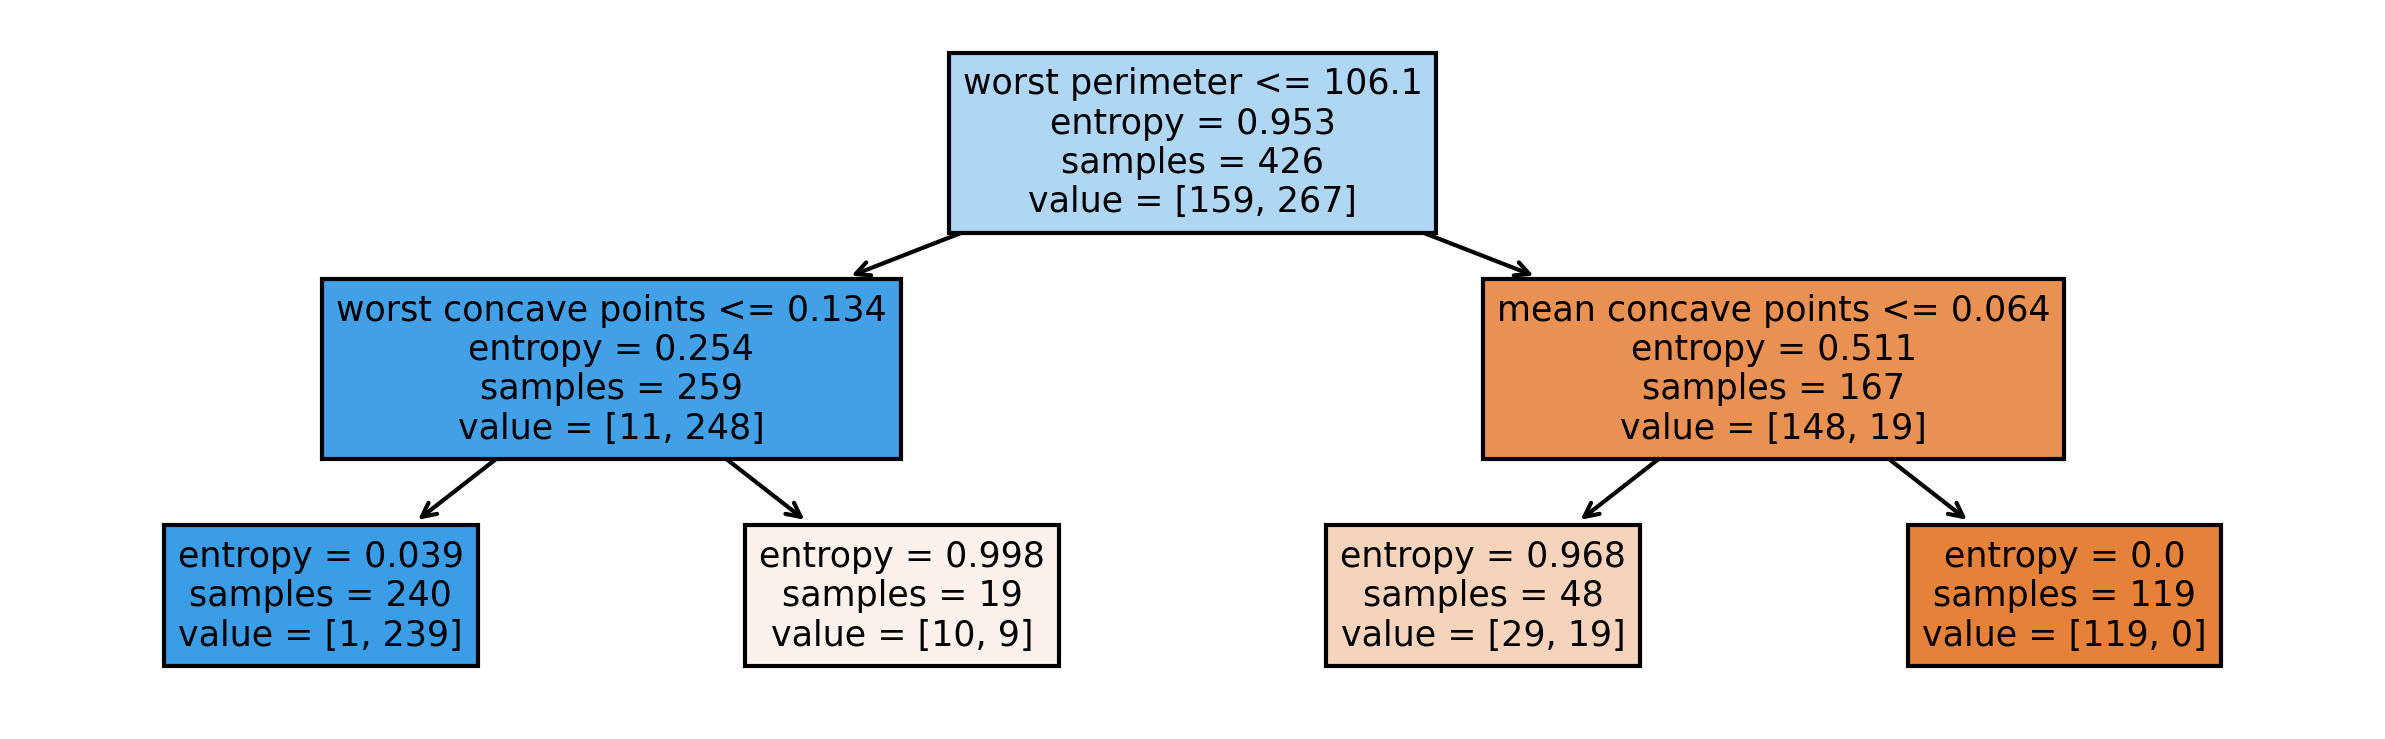

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names, filled=True)
plt.savefig("images/mpl_tree_plot.png")

# Parameter Tuning

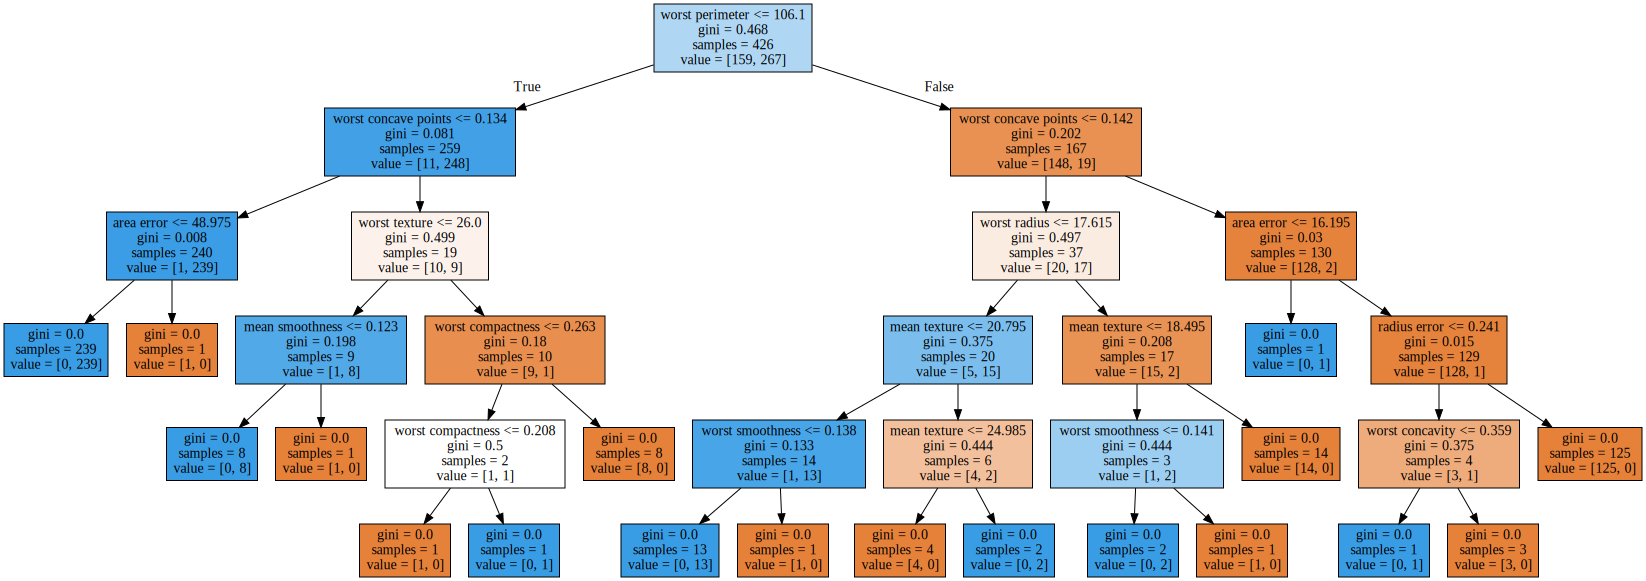

In [7]:
import graphviz
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/no_pruning", cleanup=True)
graph

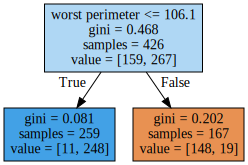

In [8]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_1", cleanup=True)
graph

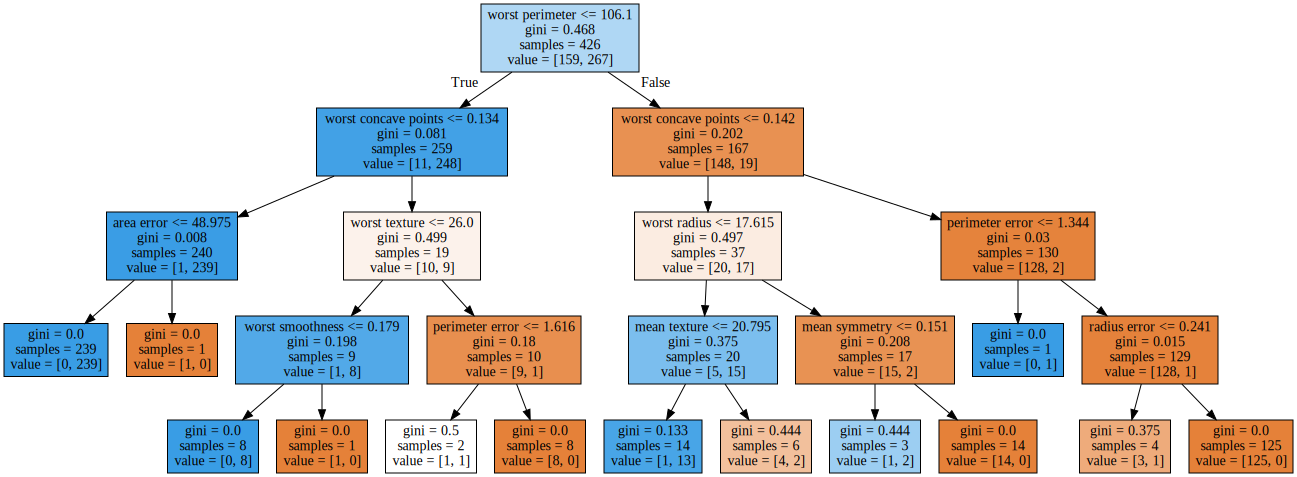

In [9]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_4", cleanup=True)
graph

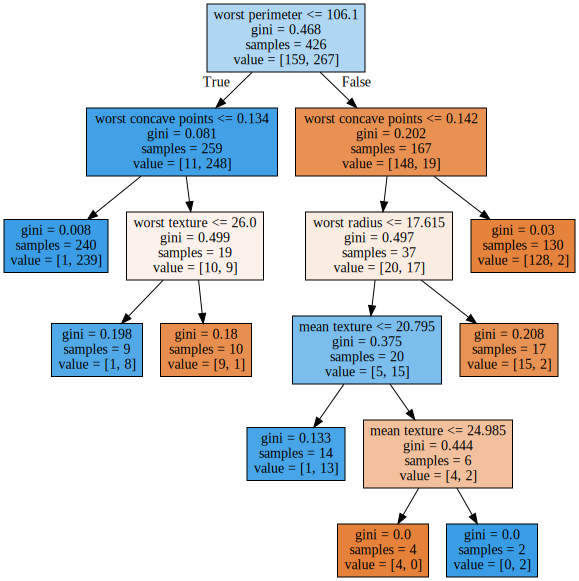

In [10]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_leaf_nodes_8", cleanup=True)
graph

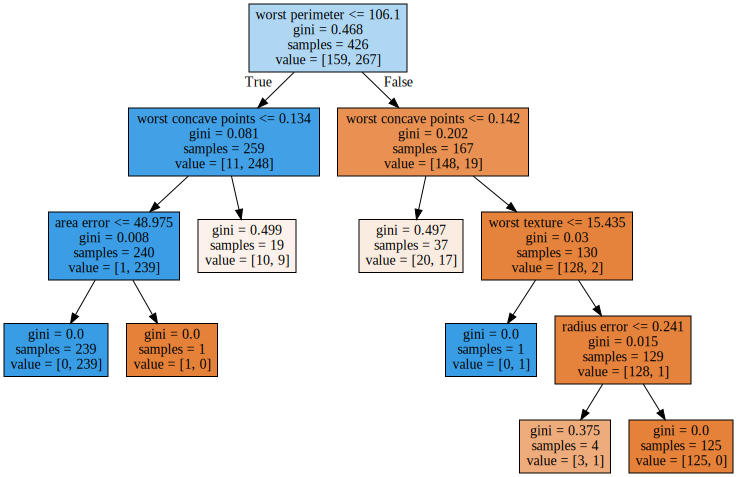

In [11]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/min_samples_split_50", cleanup=True)
graph

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)})

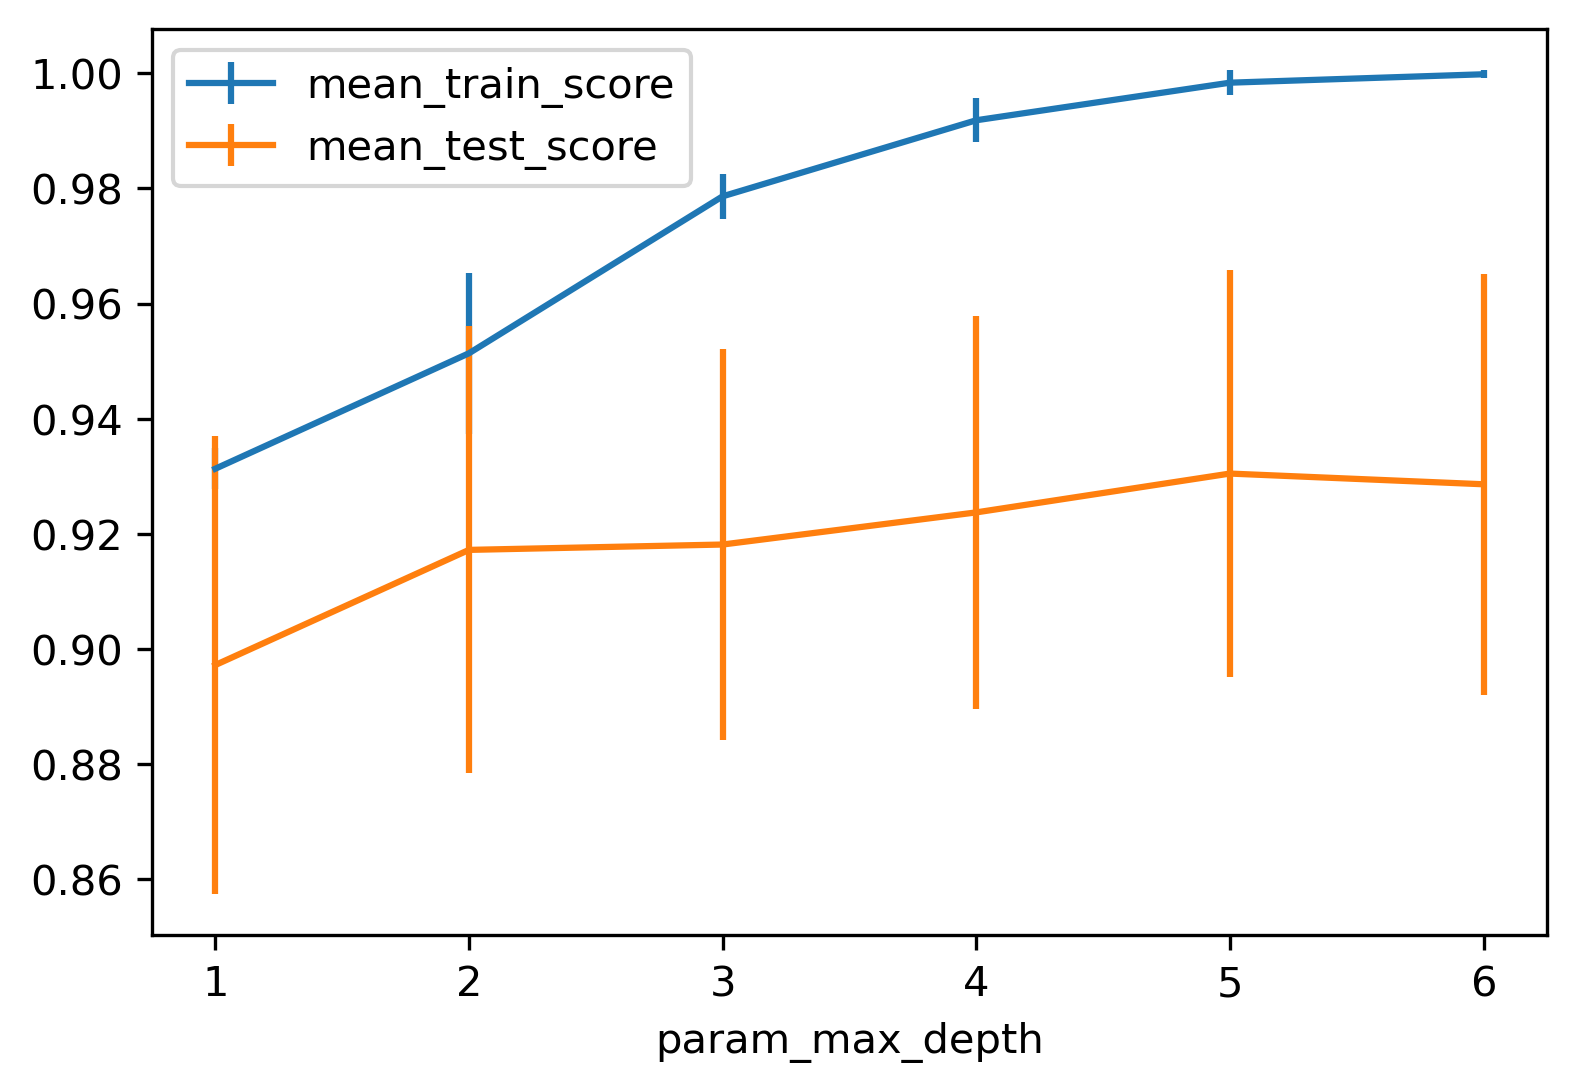

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("images/grid_max_depth.png")

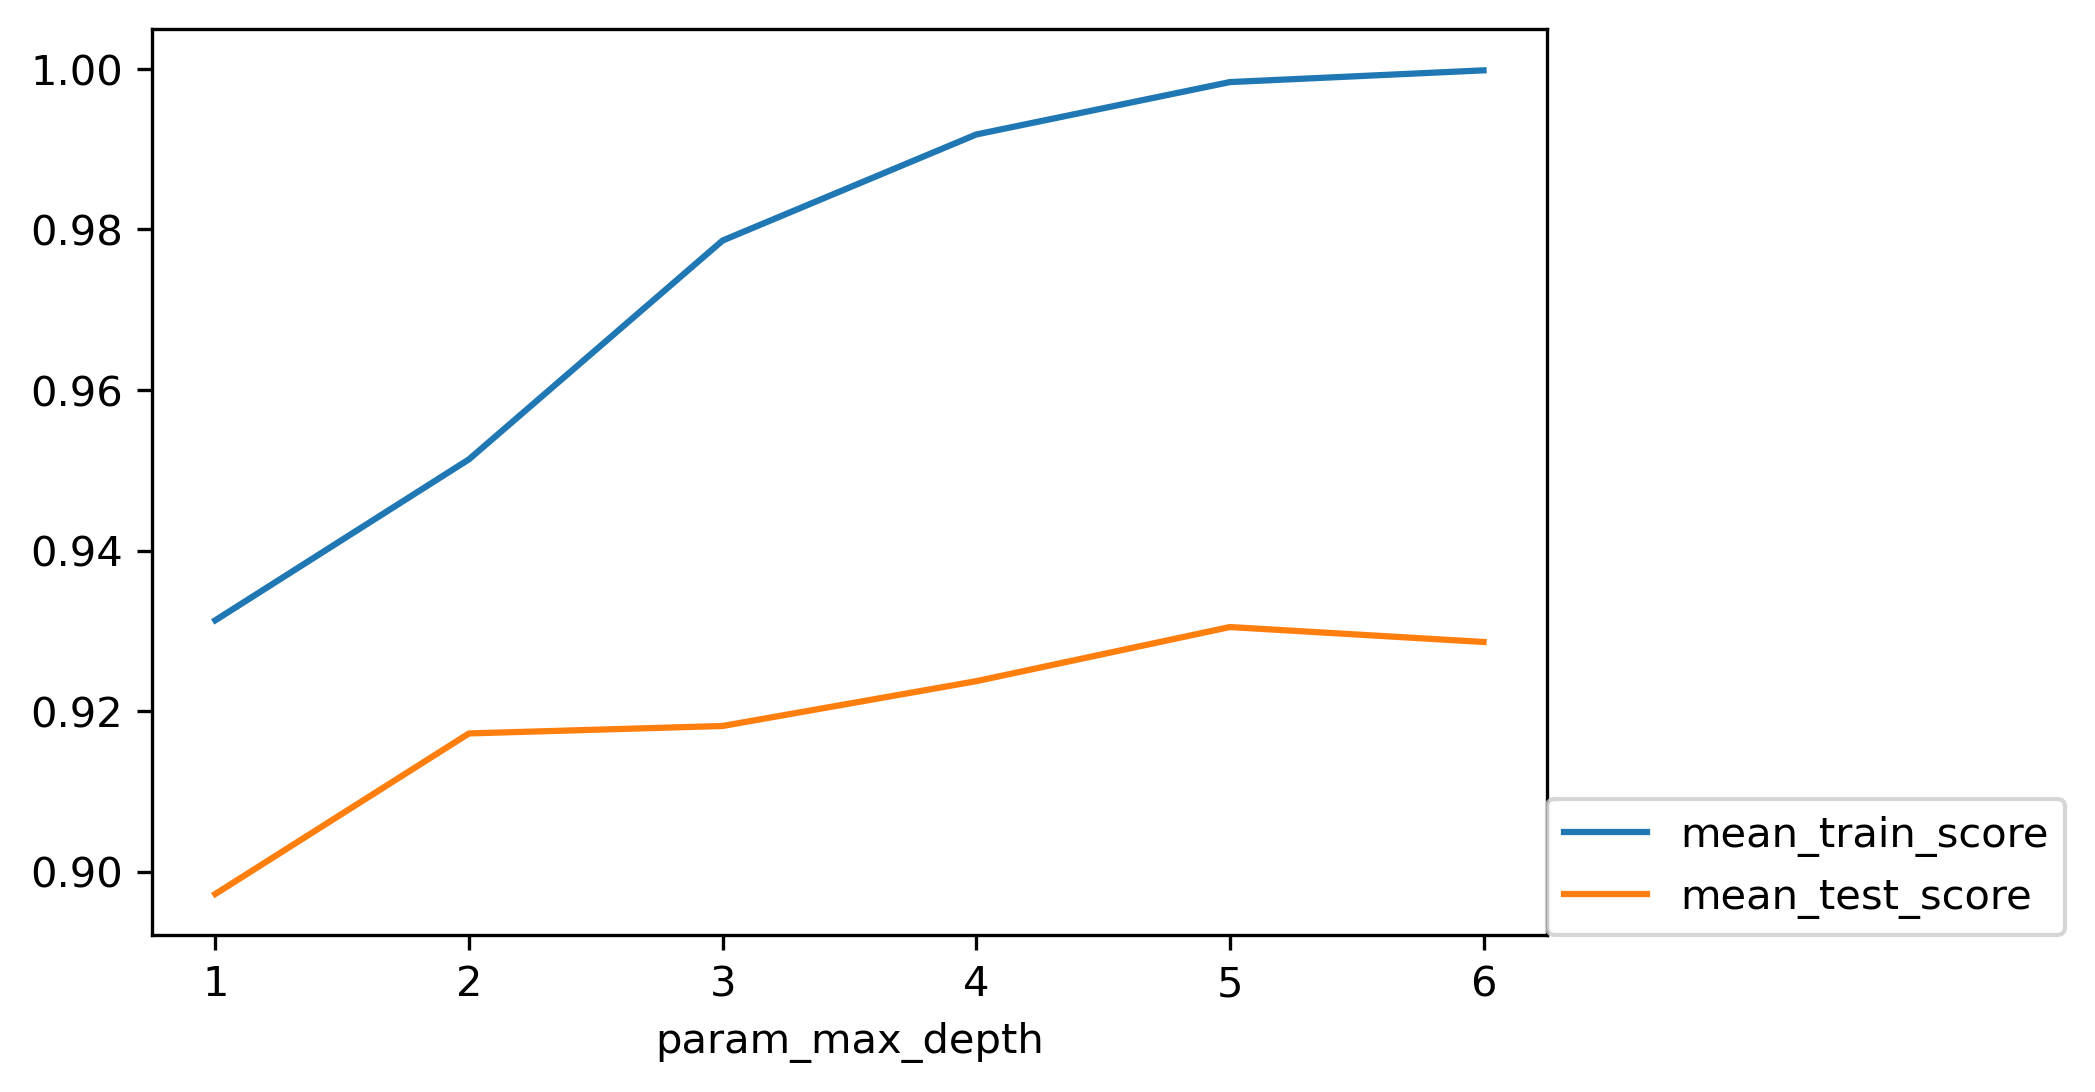

In [14]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

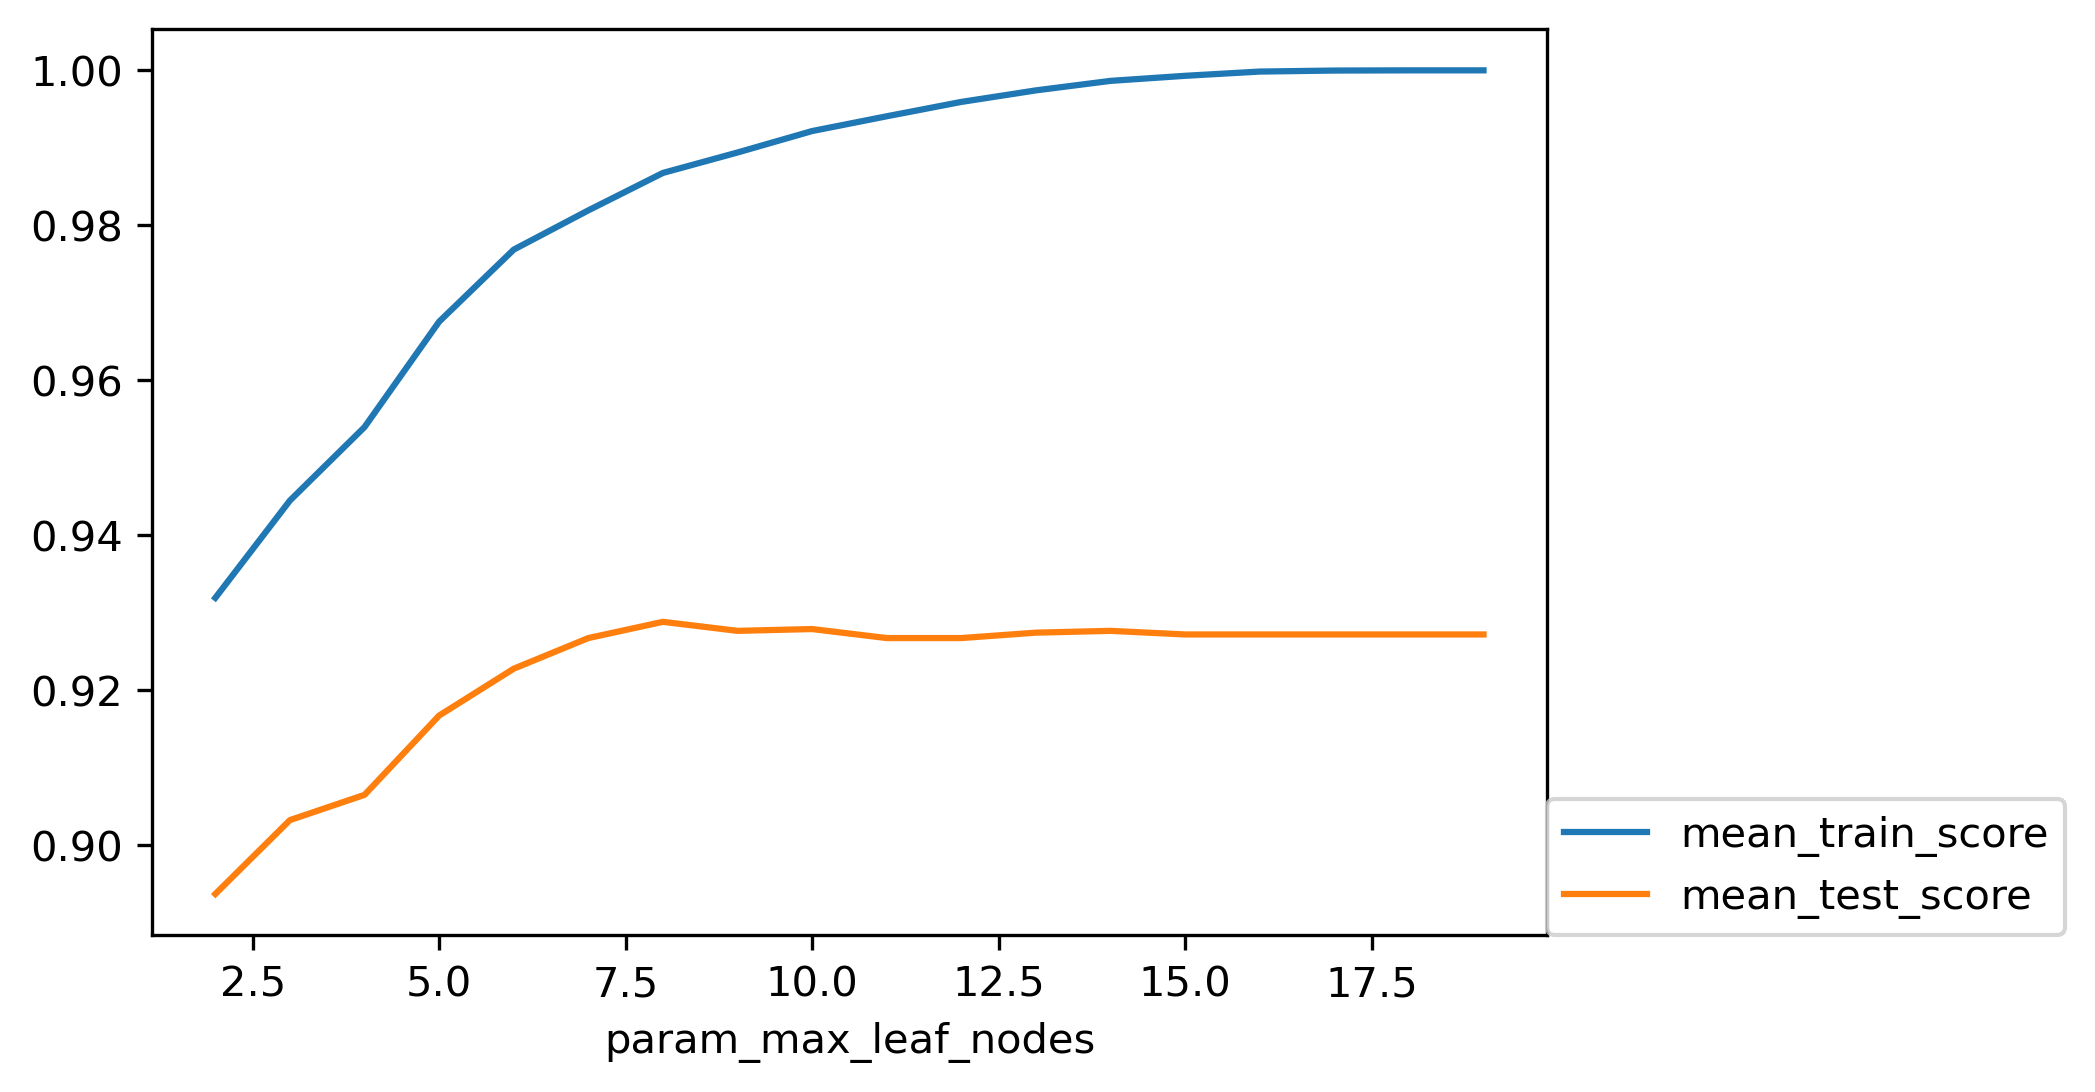

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

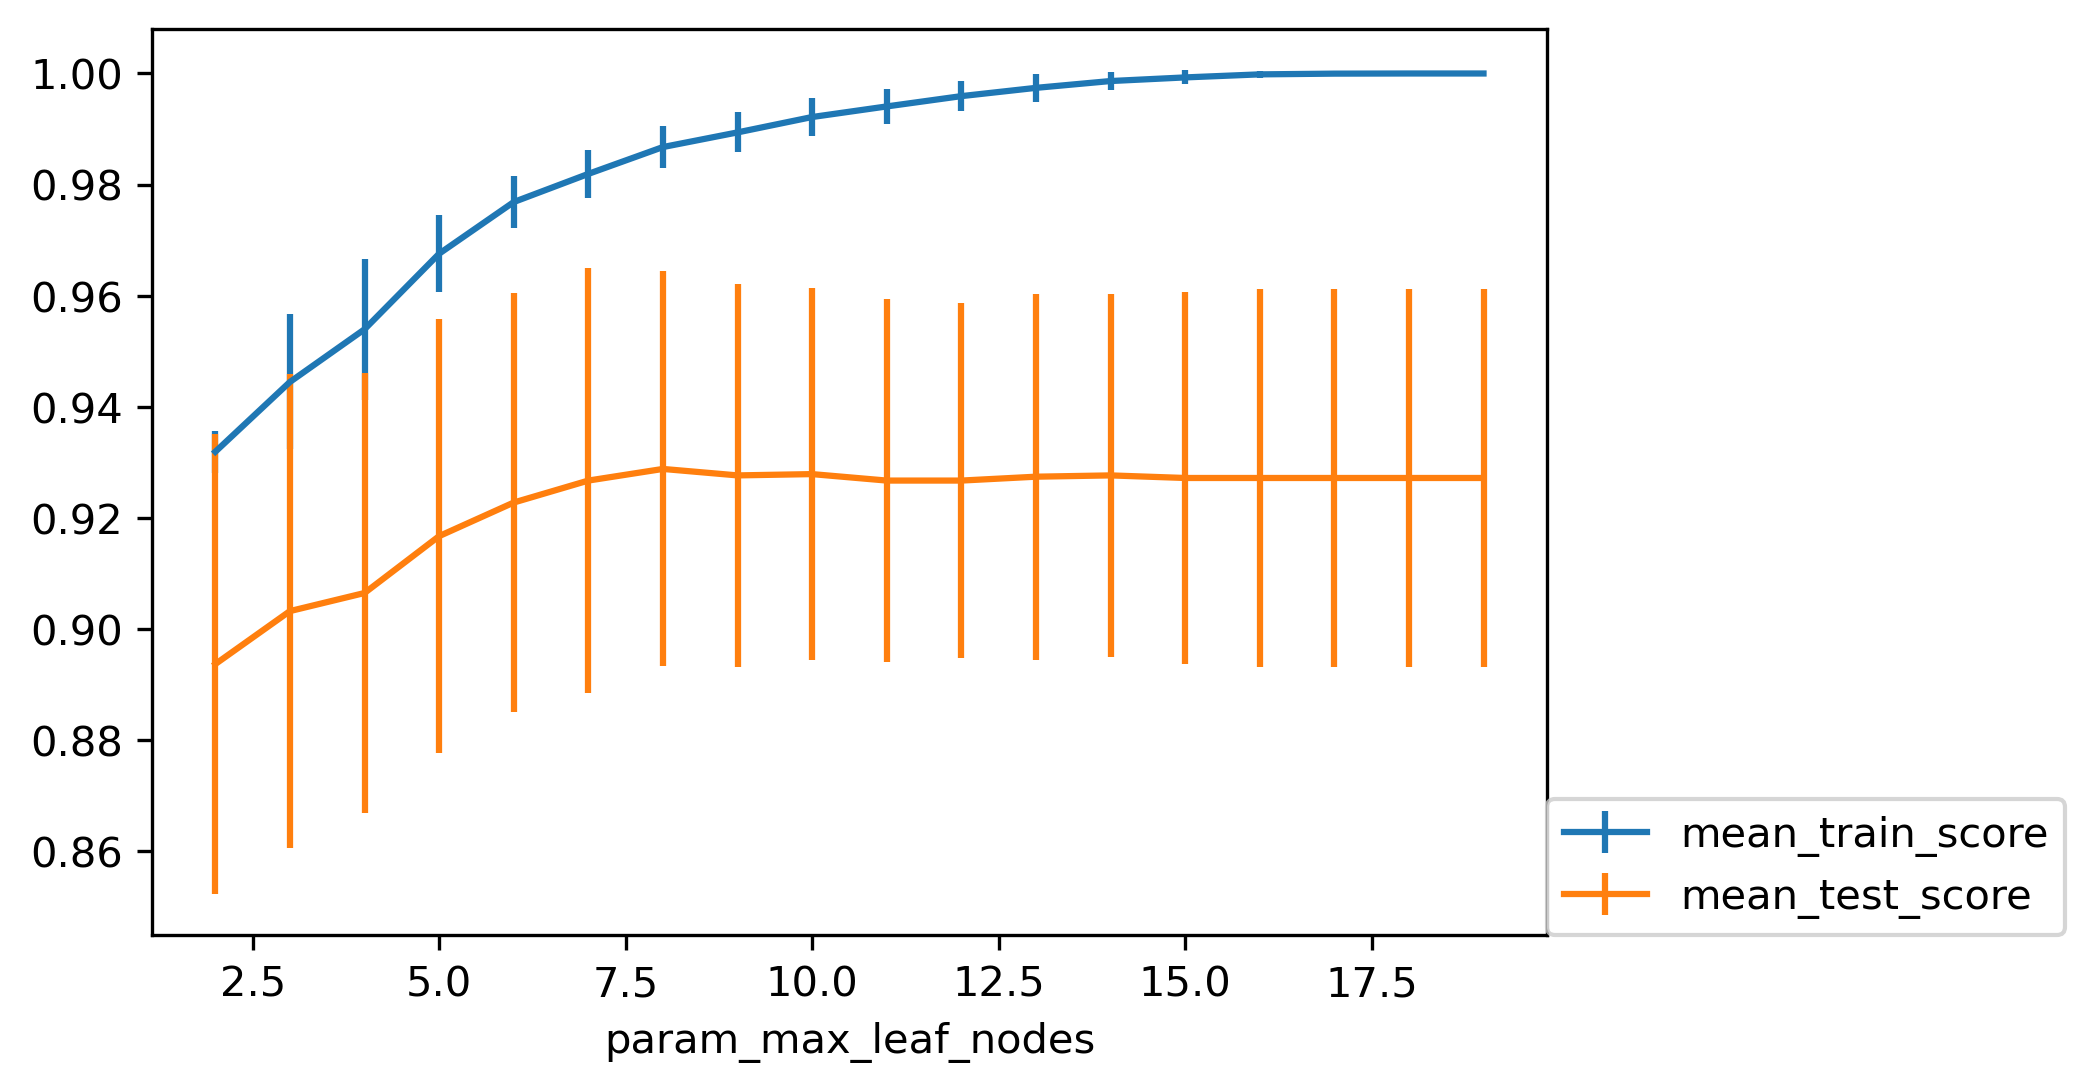

In [16]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.savefig("images/grid_max_leaf_nodes.png")

In [17]:
grid.best_params_

{'max_leaf_nodes': 8}

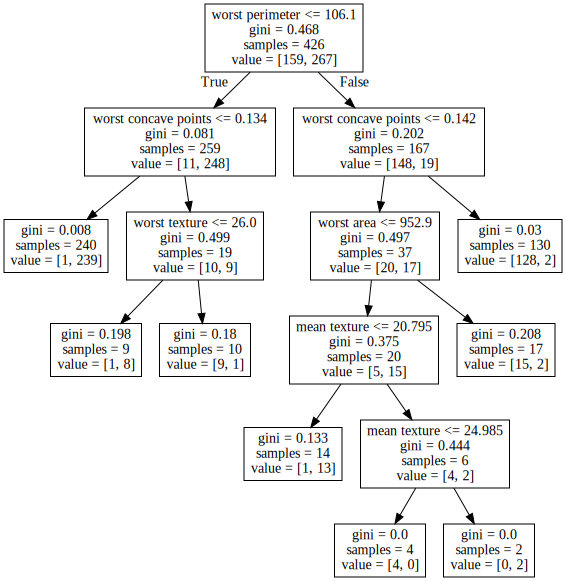

In [18]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph

# Cost-complexity pruning

In [19]:
# cheating a bit to get a good grid:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

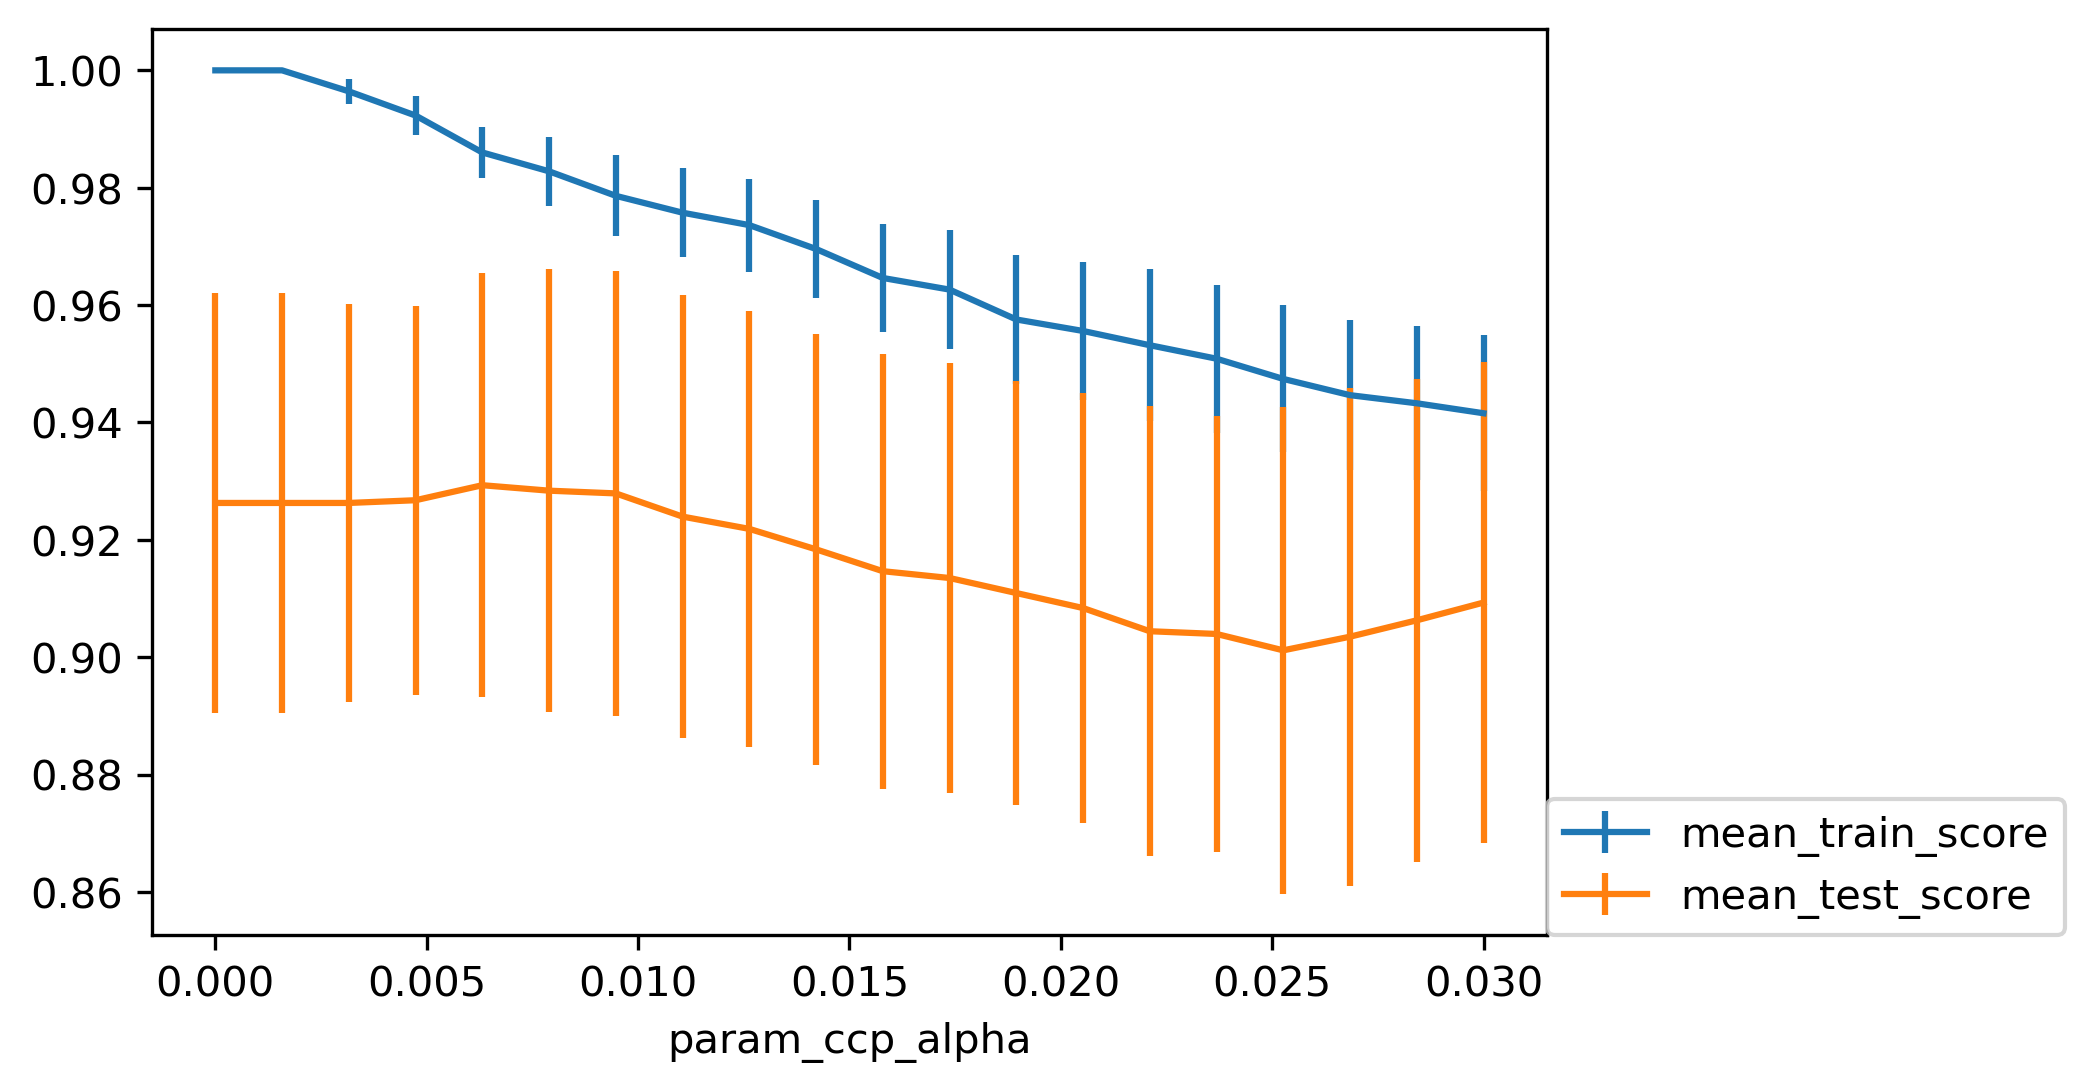

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha': [0., 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.014, 0.017, 0.023, 0.027]}
param_grid = {'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.savefig("images/grid_ccp_alpha.png")

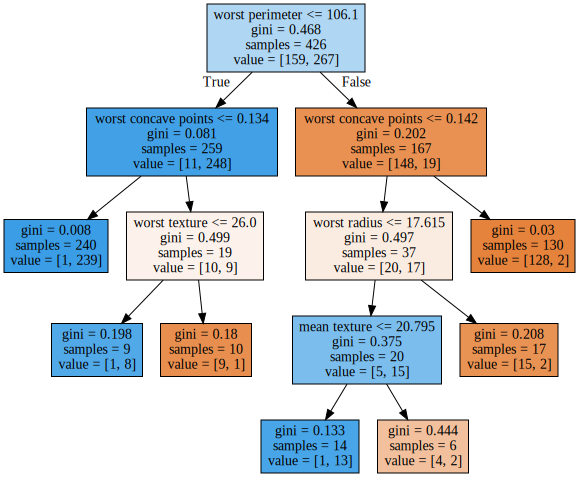

In [21]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/tree_pruned", cleanup=True)
graph

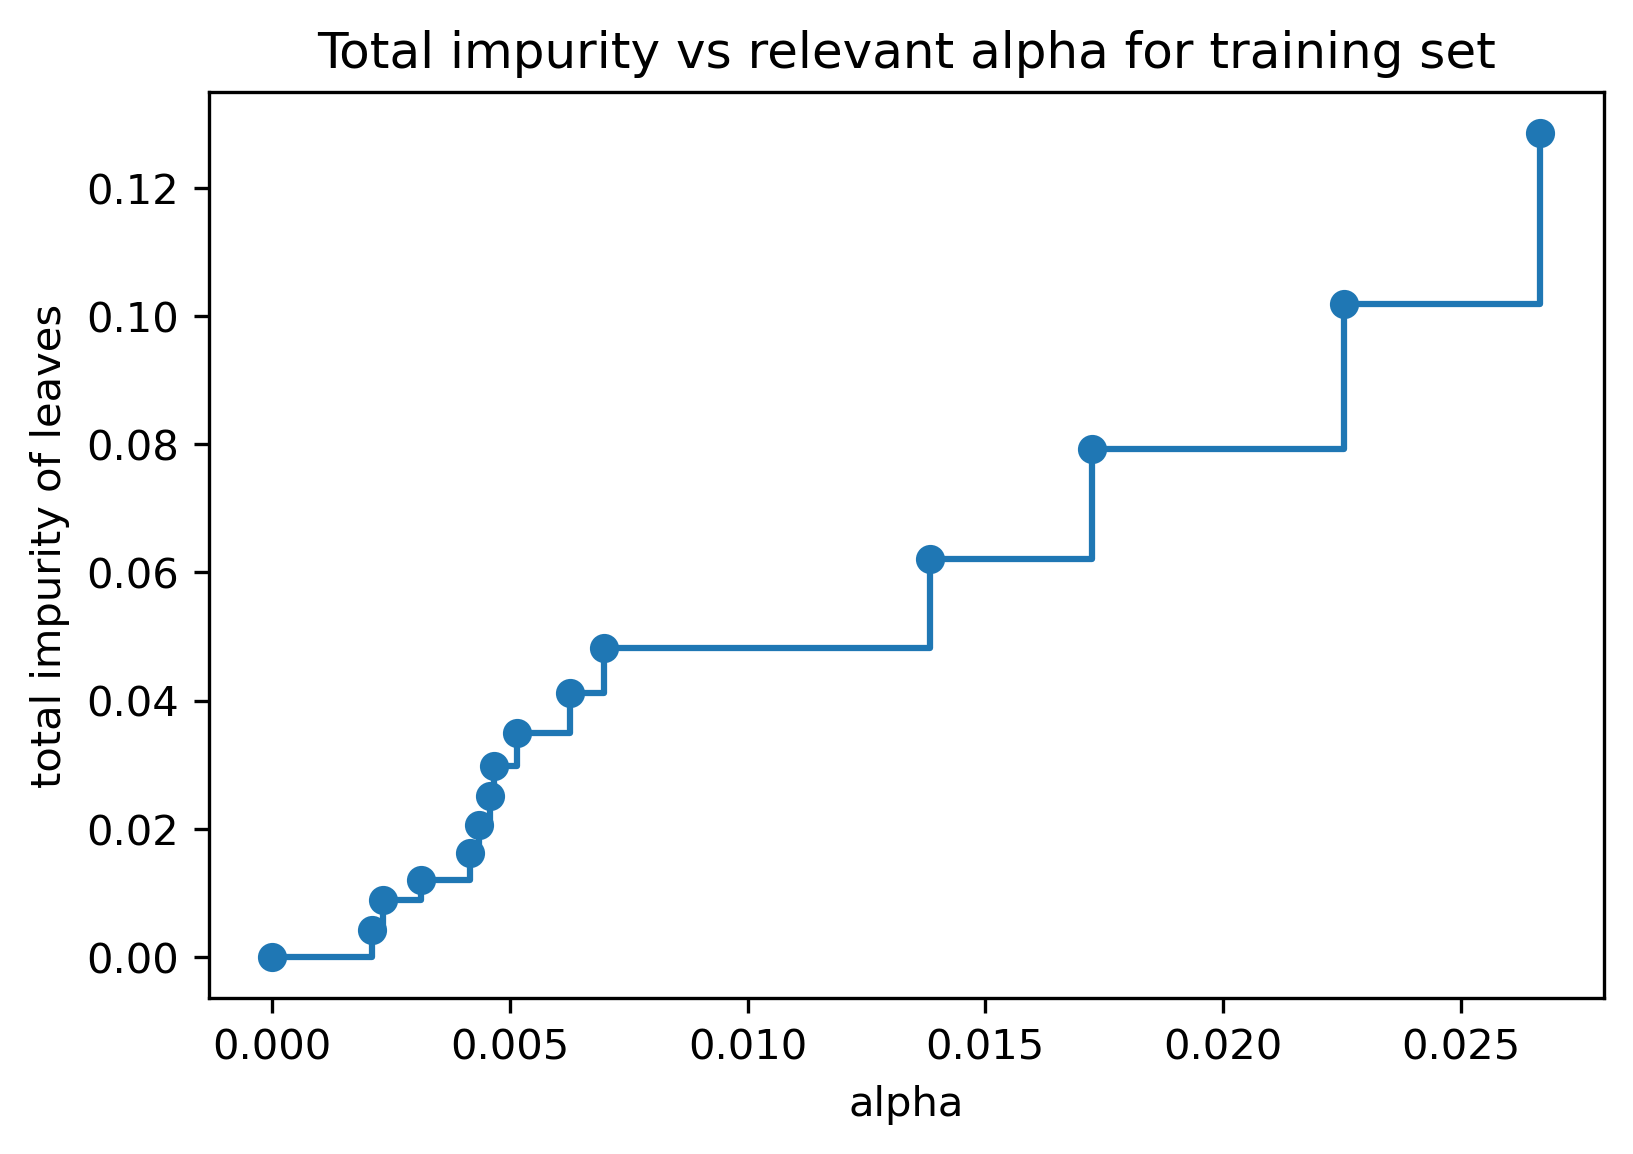

In [22]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs relevant alpha for training set")
plt.savefig("images/pruning_alpha.png")

# Voting Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
                         voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
print(("{:.2f} " * 3).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test), tree.score(X_test, y_test)))


0.88 0.84 0.80 


In [24]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
y_probs =  voting.transform(X_grid)

In [25]:
y_probs.shape

(10000, 4)

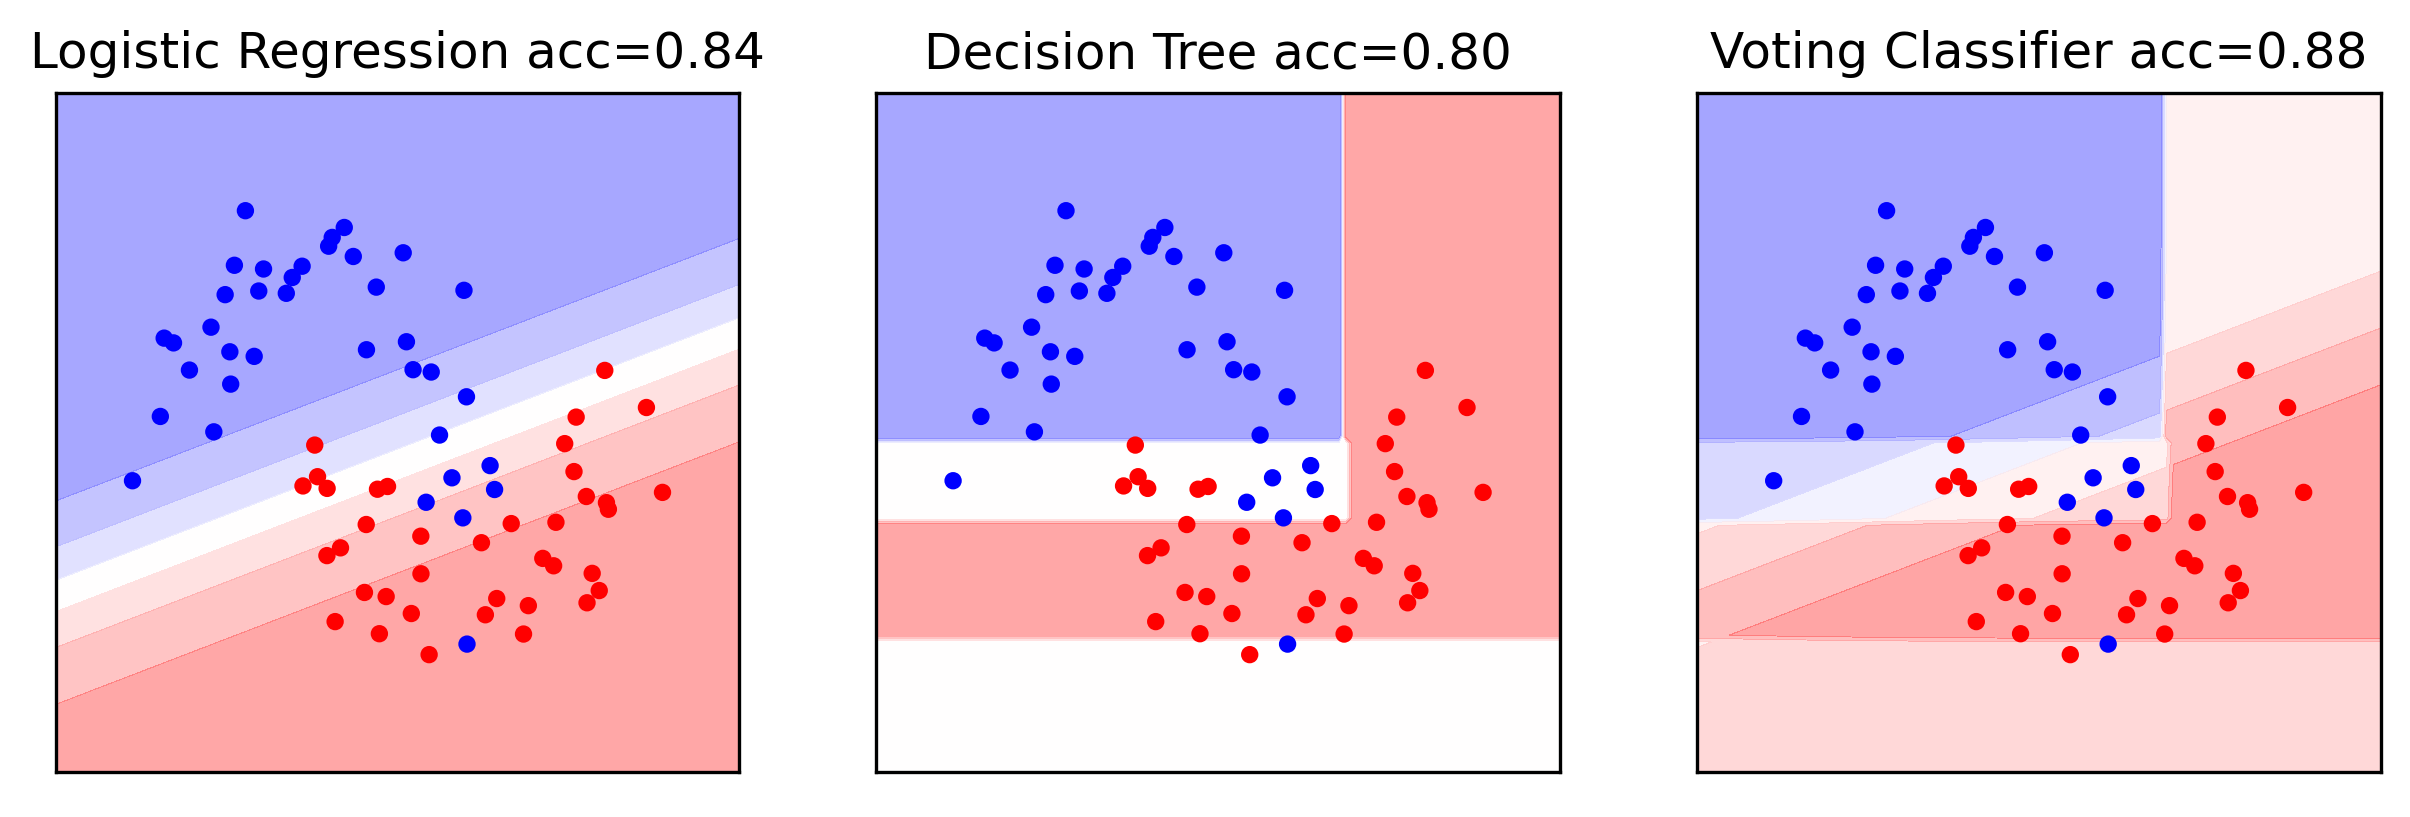

In [26]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(10, 3))
scores = [voting.estimators_[0].score(X_test, y_test),
         voting.estimators_[1].score(X_test, y_test),
         voting.score(X_test, y_test)]
titles = ['Logistic Regression', 'Decision Tree', 'Voting Classifier']
for prob, score, title, ax in zip([y_probs[:, 1], y_probs[:, 3], y_probs[:, 1::2].sum(axis=1)], scores, titles, axes.ravel()):
    ax.contourf(x_grid, y_grid, prob.reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
    ax.set_title(title + f" acc={score:.2f}")
plt.savefig("images/voting_classifier.png")

In [27]:
voting.estimators_[0].score(X_test, y_test)

0.84

In [28]:
voting.estimators_[1].score(X_test, y_test)

0.8

In [29]:
voting.score(X_test, y_test)

0.88

# Instability

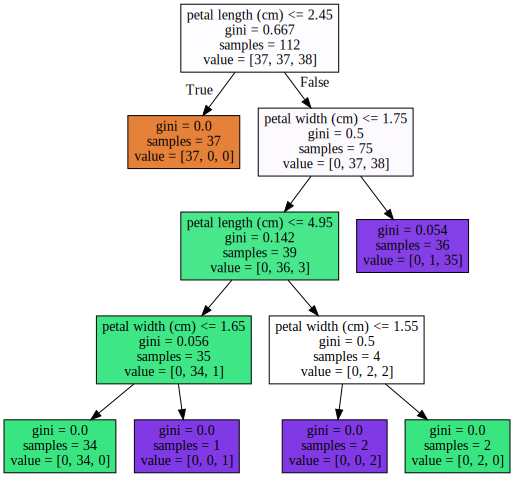

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/instability_1", cleanup=True)
graphviz.Source(tree_dot)

In [31]:
tree.feature_importances_

array([0.   , 0.   , 0.533, 0.467])

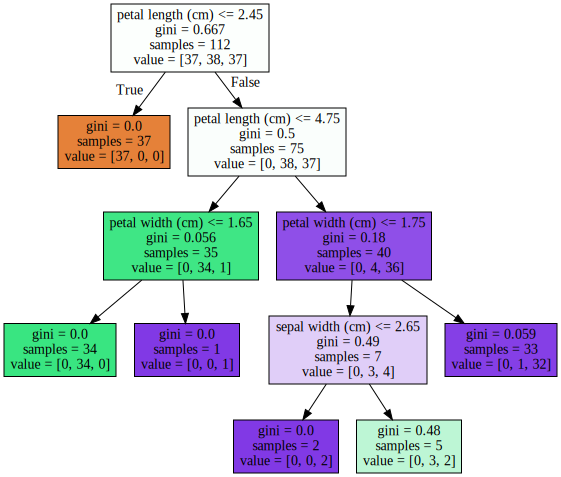

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=13)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")

graph.render(filename="images/instability_2", cleanup=True)
graphviz.Source(tree_dot)

In [33]:
tree.feature_importances_

array([0.   , 0.015, 0.932, 0.054])

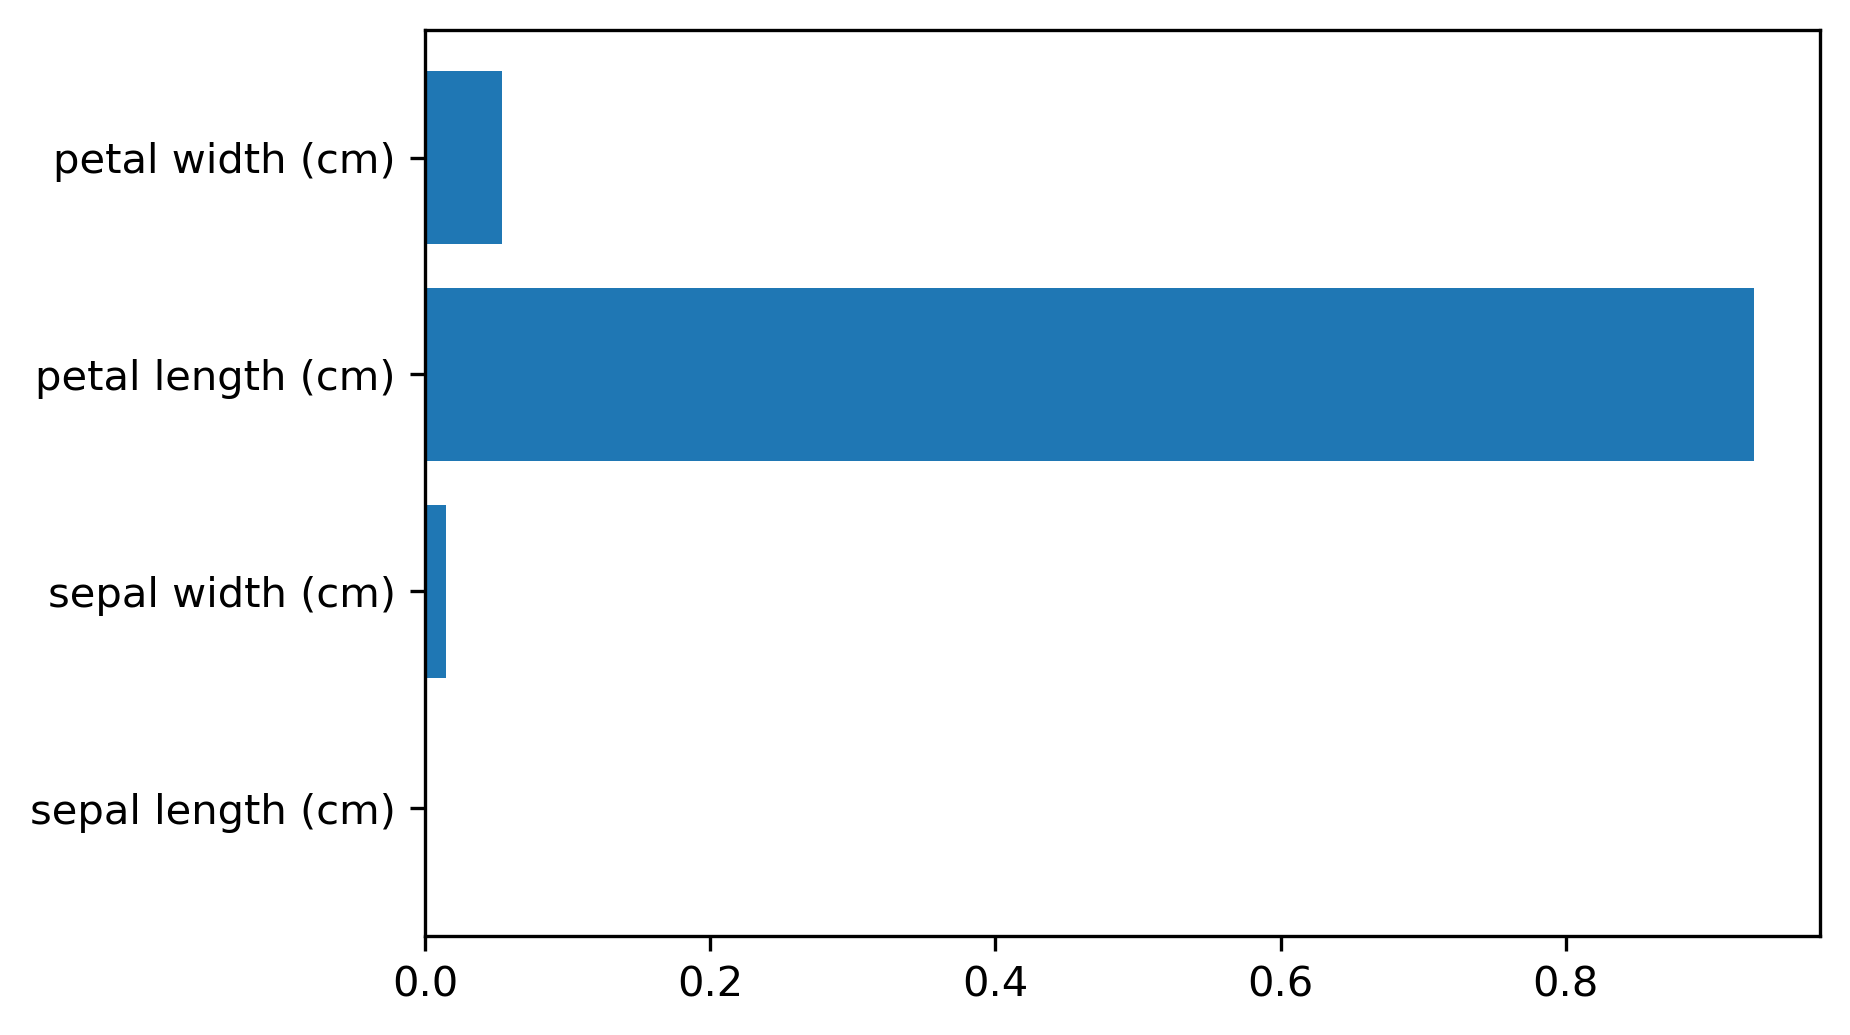

In [34]:
plt.barh(range(4), tree.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.savefig("images/tree_importances.png")

# Random Forests

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [36]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

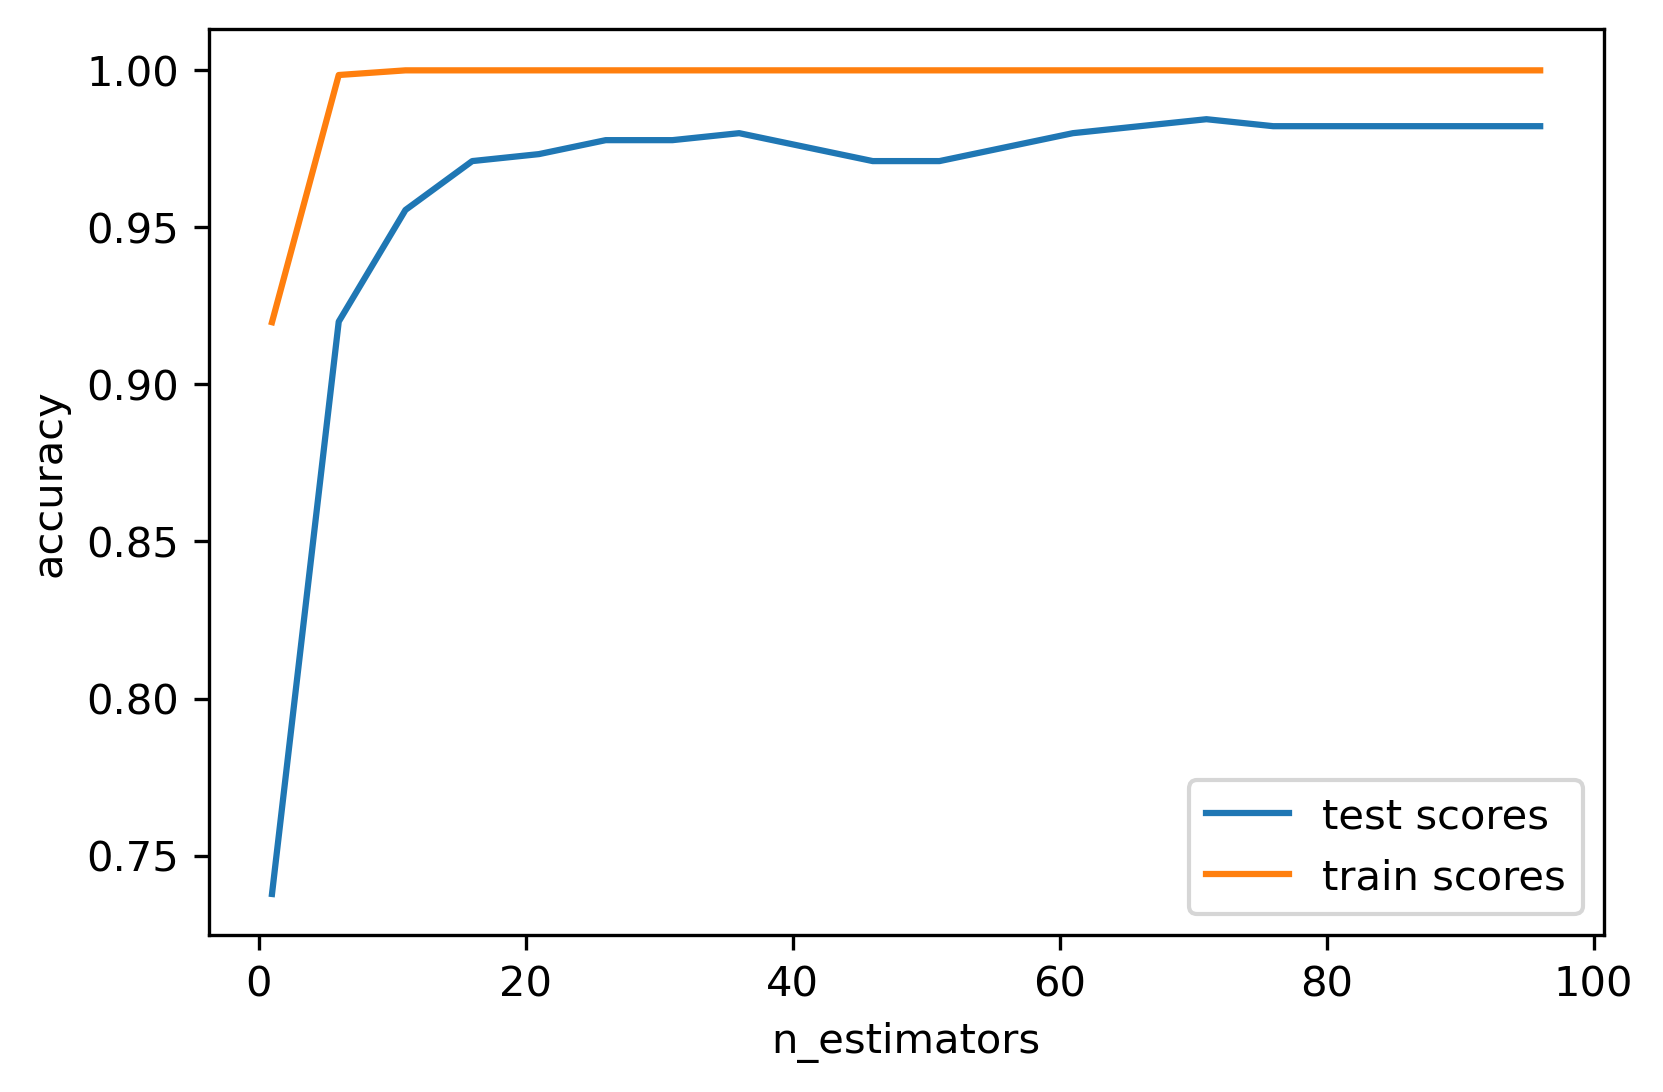

In [37]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.savefig("images/warm_start_forest.png")